In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

In [150]:
df = pd.read_csv('nyc_taxi_trip_duration.csv')
df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848
...,...,...,...,...,...,...,...,...,...,...,...
729317,id3905982,2,2016-05-21 13:29:38,2016-05-21 13:34:34,2,-73.965919,40.789780,-73.952637,40.789181,N,296
729318,id0102861,1,2016-02-22 00:43:11,2016-02-22 00:48:26,1,-73.996666,40.737434,-74.001320,40.731911,N,315
729319,id0439699,1,2016-04-15 18:56:48,2016-04-15 19:08:01,1,-73.997849,40.761696,-74.001488,40.741207,N,673
729320,id2078912,1,2016-06-19 09:50:47,2016-06-19 09:58:14,1,-74.006706,40.708244,-74.013550,40.713814,N,447


In [9]:
model=IsolationForest(n_estimators=150, max_samples='auto', contamination=float(0.05), max_features=1.0)
model.fit(df[['trip_duration']])


C:\Users\о_о\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.05, n_estimators=150)

In [10]:
df['scores']=model.decision_function(df[['trip_duration']])
df['anomaly']=model.predict(df[['trip_duration']])
df.head()


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,scores,anomaly
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400,0.155425,1
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,0.140505,1
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,0.077102,1
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,0.137436,1
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848,0.153263,1


In [11]:
an = df.loc[df['anomaly']==-1]
an.sort_values(by=['trip_duration'])

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,scores,anomaly
323299,id0578509,1,2016-02-03 12:35:22,2016-02-03 12:35:23,1,-73.980560,40.754829,-73.980560,40.754829,N,1,-0.048011,-1
533760,id0948644,2,2016-02-22 00:40:25,2016-02-22 00:40:26,0,-73.987595,40.719997,-73.987595,40.720005,N,1,-0.048011,-1
512833,id2697717,2,2016-03-27 12:55:52,2016-03-27 12:55:53,2,-73.983154,40.767159,-73.983238,40.767097,N,1,-0.048011,-1
119181,id2517984,1,2016-01-09 00:28:55,2016-01-09 00:28:56,1,-73.861961,40.768559,-73.861961,40.768559,N,1,-0.048011,-1
70318,id0553321,2,2016-04-11 19:01:35,2016-04-11 19:01:36,1,-73.945999,40.792202,-73.947411,40.792740,N,1,-0.048011,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
496391,id2307896,2,2016-05-14 04:48:05,2016-05-15 04:47:42,1,-74.000504,40.732121,-73.994202,40.712418,N,86377,-0.267411,-1
177225,id3782820,2,2016-05-12 13:48:19,2016-05-13 13:47:57,1,-73.781990,40.644722,-73.980675,40.724918,N,86378,-0.267411,-1
119185,id2837671,2,2016-06-30 16:37:52,2016-07-01 16:37:39,1,-73.992279,40.749729,-73.962524,40.800770,N,86387,-0.267411,-1
259437,id0593332,2,2016-05-31 13:00:39,2016-06-01 13:00:30,1,-73.781952,40.644688,-73.993874,40.745926,N,86391,-0.267411,-1


C:\Users\о_о\AppData\Local\Temp\ipykernel_9396\918428119.py:4: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.xlim([df.quantile(.93).pickup_longitude, df.quantile(.001).pickup_longitude])


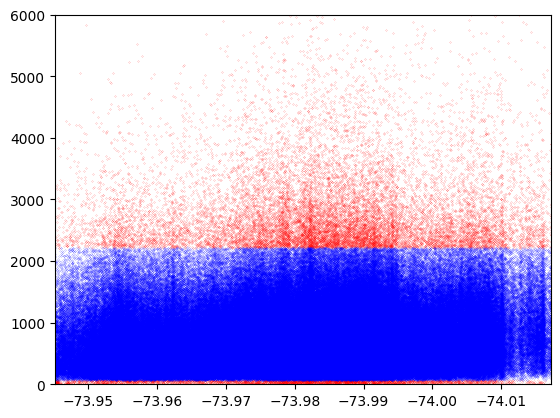

In [12]:
default = df.loc[df['anomaly']==1]

df = df.sort_values(by=['pickup_longitude'])
plt.xlim([df.quantile(.93).pickup_longitude, df.quantile(.001).pickup_longitude])
plt.ylim([0, 6000])
plt.scatter(an.pickup_longitude, an.trip_duration, c='red', s=0.01)
plt.scatter(default.pickup_longitude, default.trip_duration, c='blue', s=0.01)


In [13]:
print(float(df.quantile(.9).pickup_longitude))

print(float(df.quantile(.1).pickup_longitude))


-73.95187377929686
-74.00266265869139


C:\Users\о_о\AppData\Local\Temp\ipykernel_9396\3417116435.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(float(df.quantile(.9).pickup_longitude))
C:\Users\о_о\AppData\Local\Temp\ipykernel_9396\3417116435.py:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(float(df.quantile(.1).pickup_longitude))


In [14]:
def plot_by_field(FIELD, n_estimators, contamination):
    df = pd.read_csv('nyc_taxi_trip_duration.csv')
    model=IsolationForest(n_estimators=n_estimators, max_samples='auto', contamination=contamination, max_features=1.0)
    model.fit(df[[FIELD]])
    df['scores']=model.decision_function(df[[FIELD]])
    df['anomaly']=model.predict(df[[FIELD]])
    
    an = df.loc[df['anomaly']==-1]
    an.sort_values(by=[FIELD])
    
    default = df.loc[df['anomaly']==1]
    
    df = df.sort_values(by=['pickup_longitude'])
    plt.xlim([df.quantile(.96).pickup_longitude, df.quantile(.001).pickup_longitude])
    
    df = df.sort_values(by=[FIELD])
    plt.ylim([df.quantile(.001)[FIELD], df.quantile(.99)[FIELD],])
    
    plt.scatter(an.pickup_longitude, an[FIELD], c='red', s=0.01)
    plt.scatter(default.pickup_longitude, default[FIELD], c='blue', s=0.01)


C:\Users\о_о\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\о_о\AppData\Local\Temp\ipykernel_9396\1443874274.py:14: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.xlim([df.quantile(.96).pickup_longitude, df.quantile(.001).pickup_longitude])
C:\Users\о_о\AppData\Local\Temp\ipykernel_9396\1443874274.py:17: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.ylim([df.quantile(.001)[FIELD], df.quantile(.99)[FIELD],])


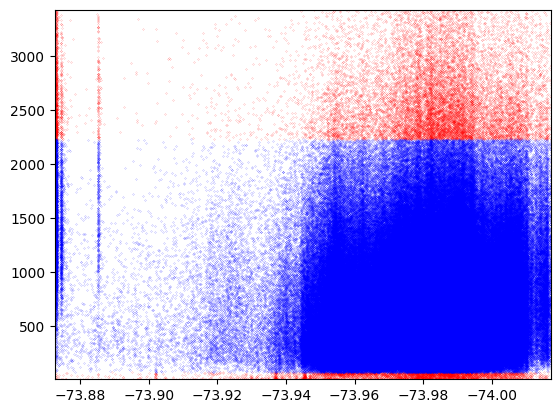

In [15]:
plot_by_field(FIELD='trip_duration', n_estimators=100, contamination=float(0.05))

<Axes: xlabel='pickup_datetime'>

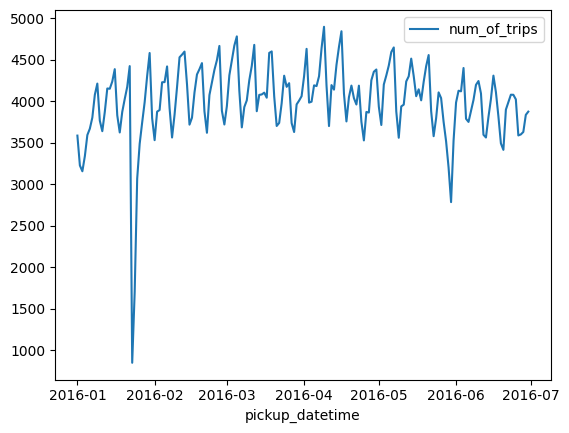

In [16]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['pickup_datetime'][0].date

# pd.pivot_table(df, index=['pickup_datetime'], columns=['pickup_datetime'], values=['passenger_count'], aggfunc='count')
date_df = df.groupby([df['pickup_datetime'].dt.date]).count().drop(columns=['vendor_id', 'pickup_datetime', 'dropoff_datetime', 'passenger_count', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag', 'trip_duration', 'scores', 'anomaly']).rename(columns={'id': 'num_of_trips'})
date_df.plot()

C:\Users\о_о\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


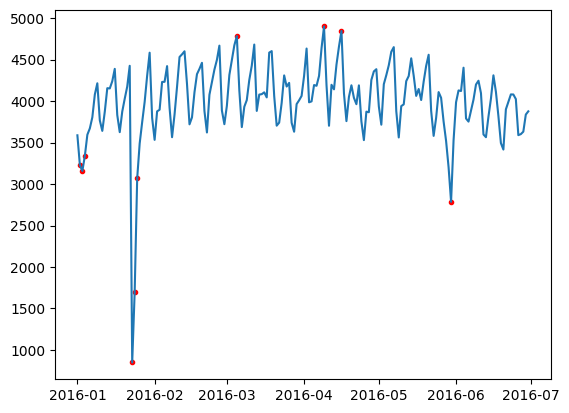

In [148]:

model=IsolationForest(n_estimators=150, max_samples='auto', contamination=float(0.05), max_features=1.0)
model.fit(date_df[['num_of_trips']])
date_df['scores']=model.decision_function(date_df[['num_of_trips']])
date_df['anomaly']=model.predict(date_df[['num_of_trips']])

an = date_df.loc[date_df['anomaly']==-1]
an.index
an.sort_values(by=['num_of_trips'])

default = date_df.loc[date_df['anomaly']==1]
default

plt.plot(date_df.index, date_df['num_of_trips'])
plt.scatter(an.index, an['num_of_trips'], c='red', s=9)

# df = df.sort_values(by=['pickup_longitude'])
# plt.xlim([df.quantile(.93).pickup_longitude, df.quantile(.001).pickup_longitude])

# df = df.sort_values(by=[FIELD])
# plt.ylim([df.quantile(.001)[FIELD], df.quantile(.99)[FIELD],])

# plt.scatter(an.pickup_longitude, an[FIELD], c='red', s=0.01)
# plt.scatter(default.pickup_longitude, default[FIELD], c='blue', s=0.01)


In [140]:
def by_weekday(n):
    weekdays = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3:'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
    
    weekday_df = df.loc[df['pickup_datetime'].dt.weekday == n]
    weekday_df = weekday_df.groupby([weekday_df['pickup_datetime'].dt.date]).count().drop(columns=['vendor_id', 'pickup_datetime', 'dropoff_datetime', 'passenger_count', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag', 'trip_duration', 'scores', 'anomaly']).rename(columns={'id': 'num_of_trips'})

    model=IsolationForest(n_estimators=100, max_samples='auto', contamination=float(0.2), max_features=1.0)
    model.fit(weekday_df[['num_of_trips']])
    
    weekday_df['scores']=model.decision_function(weekday_df[['num_of_trips']])
    weekday_df['anomaly']=model.predict(weekday_df[['num_of_trips']])

    an = weekday_df.loc[weekday_df['anomaly']==-1]
    an.index
    an.sort_values(by=['num_of_trips'])

    default = weekday_df.loc[weekday_df['anomaly']==1]
    weekday_df.num_of_trips

    #weekday_df.plot()
    plt.title(weekdays[n])
    plt.plot(weekday_df.index, weekday_df['num_of_trips'])
    plt.scatter(an.index, an['num_of_trips'], c='red', s=17)

C:\Users\о_о\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


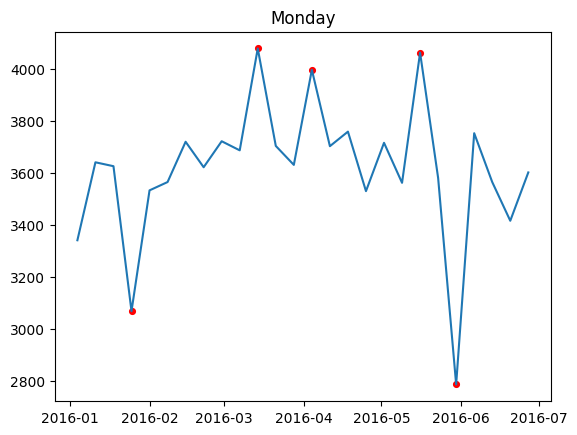

In [141]:
by_weekday(0)

C:\Users\о_о\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


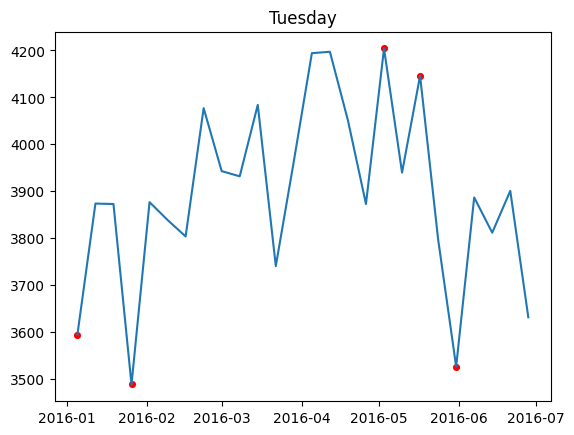

In [142]:
by_weekday(1)

C:\Users\о_о\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


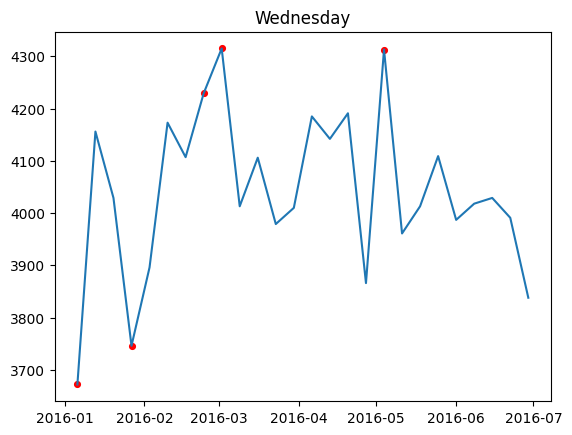

In [143]:
by_weekday(2)

C:\Users\о_о\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


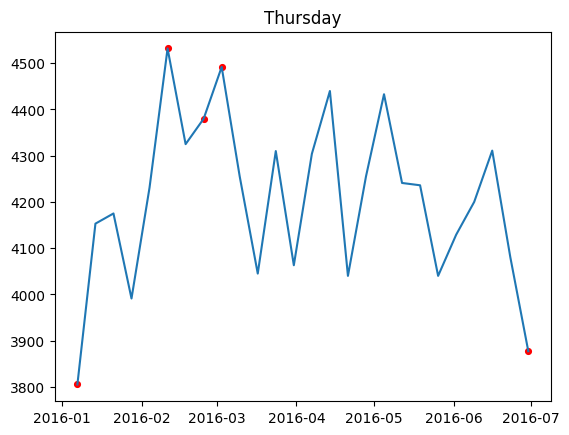

In [144]:
by_weekday(3)

C:\Users\о_о\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


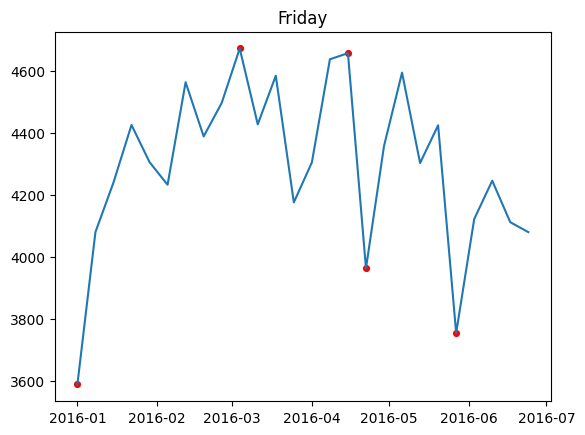

In [145]:
by_weekday(4)

C:\Users\о_о\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


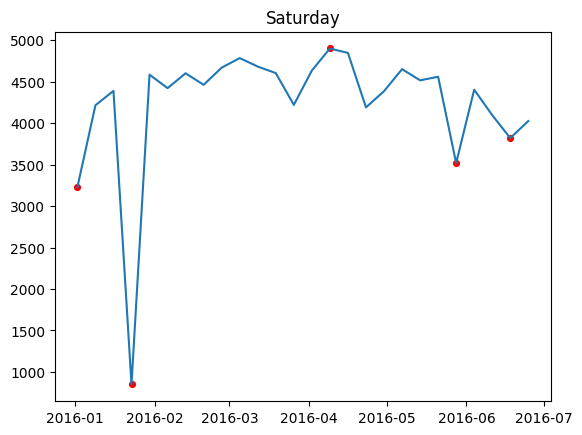

In [146]:
by_weekday(5)

C:\Users\о_о\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


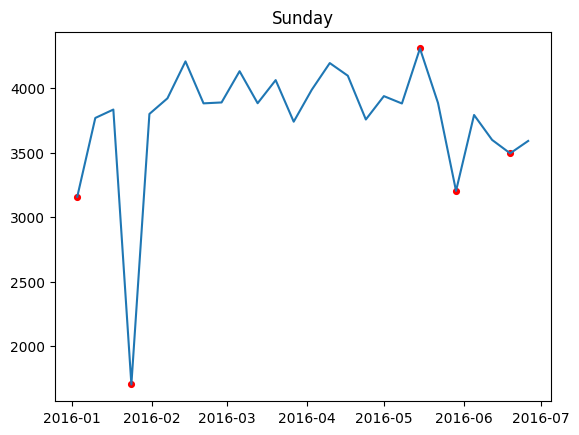

In [147]:
by_weekday(6)